In [1]:
from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    return

import matplotlib.pyplot as plt
plt.ion()

from phys_functions import init_slope
from phys_constants import *
from IO import *
from hydro_fits import *
from radiation import *

In [2]:
key = 'sph_fid'
env = MyEnv(key)
front = 'RS'
data = open_rundata(key, 4)
data_fitted = replace_withfit(data)
contribs = data_fitted.drop_duplicates(subset='i')
print(len(data), len(contribs))


1931 452


In [3]:
%%skip
%matplotlib qt
plt.plot(data.index, data.rho, label='initial data')
plt.plot(data_fitted.index, data_fitted.rho, label='fitted early')
plt.scatter(contribs.index, contribs.rho, marker='x', c='k', label='contributing cells')
plt.legend()

In [4]:
cell =contribs.loc[420]
print(cell)

t         101.453396
dt          2.251765
nact      920.000000
i         446.000000
x        2768.199101
dx          0.000079
dlx         0.000179
rho         4.135290
vx          0.999969
p           0.274065
D         524.568200
sx      77893.082717
tau     77370.660908
trac        1.000000
Sd          1.000000
v                NaN
Name: 420.0, dtype: float64


In [5]:
Lth, nu_m = get_vars(cell, ['Lth', 'nu_m2'], env)
print(Lth, nu_m)

9.65960357616984e+27 9.882180621348313e+19


In [6]:
Ton, Tth, Tej = get_variable(cell, 'obsT', env)
print(Ton, Tth, Tej)

0.07525462585908826 0.17203844982603944 -0.09678382396695118


In [7]:
cell_l = contribs.iloc[-1]
Lth, nu_m = get_vars(cell_l, ['Lth', 'nu_m2'], env)
Ton, Tth, Tej = get_variable(cell_l, 'obsT', env)
print(cell_l.rho, Ton, Tej, Tth, nu_m, Lth)


0.6907777271271742 0.3685512766805914 0.0011390358046426408 0.36741224087594876 2.1471091643846128e+19 1.6798410548321607e+28


In [8]:
%%skip
i_set, front = 400, 'RS'
env = MyEnv(data.attrs['key'])
ShSt0 = env.lfac34 - 1 if (front == 'RS') else env.lfac21 -1
# get variables and normalize
index = data.index.to_numpy(copy=True)
r, lfac, ShSt = get_vars(data, ['x', 'lfac', 'ShSt'], env)

r *= c_/env.R0
lfac /= env.lfac0
lfac2 = lfac*lfac
ShSt /= ShSt0

In [9]:
%%skip
popt_lfac, popt_ShSt = get_hydrofits_shell(data)
x_lf, m, s_lf = popt_lfac
x_sh, n, s_sh = popt_ShSt
x = np.linspace(1, r.max(), 500)
fit_lfac = smooth_bpl(x, x_lf, m, 0, s_lf)
fit_ShSt = smooth_bpl(x, x_sh, n, 0, s_sh)

In [10]:
%%skip
plt.plot(r, lfac2, c='C0', label='$\\Gamma_{\\rm d}^2$')
plt.plot(x, fit_lfac, c='k', ls='--')
plt.plot(r, ShSt, c='C1', label='$\\Gamma_{\\rm ud} - 1$')
plt.plot(x, fit_ShSt, c='k', ls='--', label='fits')
plt.plot(RS.x*c_/env.R0, get_variable(RS, 'ShSt', env)/ShSt0, c='C1', ls='--')
plt.xlabel('$R/R_0$')
plt.legend()
plt.ylim((0.6, 1.5))

Text(0.5, 1.0, 'new method')

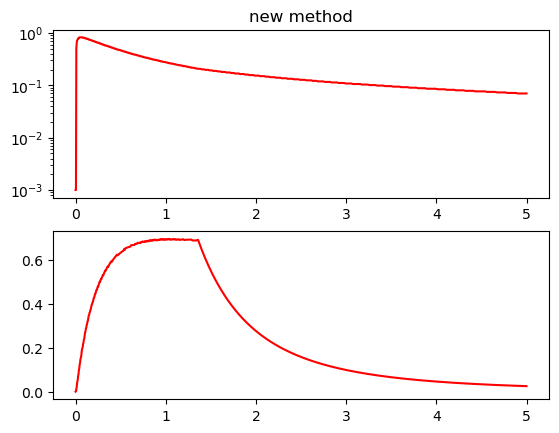

In [13]:
nu, T, env = obs_arrays(key, normed=True)
nu_pk, nF_pk = get_peaks_from_data(key, 'RS')
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.semilogy(T-1, nu_pk, c='r')
ax2.plot(T-1, nF_pk, c='r')
ax1.set_title('new method')

In [12]:
%%skip
fig, ax = plt.subplots()
ax.loglog(nu_pk, nF_pk, c='r')